In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout,Input,Activation,Dense
from tensorflow.keras.models import Sequential,Model,load_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold

# 모델링

In [2]:
def modeling():
    inputs = Input(shape=(28,28,1))
    x = inputs
    _x = Conv2D(128,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(256,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(512,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    x = _x
    _x = Conv2D(128,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(256,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(512,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    x = x+_x
    x = MaxPooling2D(2)(x)
    _x = Conv2D(128,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(256,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(512,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    x = x+_x
    x = MaxPooling2D(2)(x)
    _x = Conv2D(128,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(256,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(512,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    x = x+_x
    x = MaxPooling2D(2)(x)
    _x = Conv2D(512,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    x = x+_x
    x = MaxPooling2D(2)(x)
    x = Flatten()(x)
    x = Dense(2048)(x)
    x = Dense(10,activation='softmax')(x)
    outputs=x
    model = Model(inputs=inputs,outputs=outputs)
    return model

# 하이퍼 파라미터

In [13]:
epochs = 2000
es = EarlyStopping(monitor='val_loss',patience=160)
reLR = ReduceLROnPlateau(patience=100,verbose=1,factor=0.5)
kfold = StratifiedKFold(n_splits=40,random_state=42,shuffle=True)

datagen = ImageDataGenerator(height_shift_range=(-1,1),width_shift_range=(-1,1))
datagen2 = ImageDataGenerator()

# 데이터 불러오기 및 전처리

In [14]:
df = pd.read_csv("train.csv",index_col=[0])
y = df.values[:,0].astype('int32')
x = df.values[:,2:].astype('float32')/255.0
# print(x.shape,y.shape)               # (2048, 28, 28) (2048,)
#onehot = OneHotEncoder()
#y = onehot.fit_transform(y.reshape(-1,1)).toarray().astype('float32')
x = x.reshape(-1,28,28,1)
# x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.15)
# x_train = x_train.reshape(-1,28,28,1)#[:,2:26,2:26,:]
# x_val = x_val.reshape(-1,28,28,1)#[:,2:26,2:26,:]
# print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)
print(x.shape,y.shape) 
y

(2048, 28, 28, 1) (2048,)


array([5, 0, 4, ..., 9, 0, 5])

In [ ]:
index=1
result = 0
for train_index,val_index in kfold.split(x,y):
    if index!=1:
        modelpath = './models/02_03_imger_best_index_{}.h5'.format(index)
        cp = ModelCheckpoint(monitor = 'val_accuracy',filepath=modelpath,save_best_only=True)


        x_train = x[train_index]
        x_val = x[val_index]
        y_train = y[train_index]
        y_val = y[val_index]

        onehot = OneHotEncoder()
        y_train = onehot.fit_transform(y_train.reshape(-1,1)).toarray().astype('float32')
        y_val = onehot.fit_transform(y_val.reshape(-1,1)).toarray().astype('float32')

        train_generator = datagen.flow(x_train,y_train,batch_size=32)
        val_generator = datagen.flow(x_val,y_val)
        model = modeling()
        model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
        model.fit_generator(train_generator,validation_data = val_generator,epochs=epochs,callbacks=[cp,es,reLR])

        model = load_model(modelpath)
        df = pd.read_csv("test.csv",index_col=[0])
        x_test = df.values[:,1:].reshape(-1,28,28).astype('float32')/255.0
        y_pred = model.predict(x_test)
        y_pred = np.argmax(y_pred,axis=-1)
        df_sub = pd.read_csv('submission.csv',index_col=0)
        df_sub['digit'] = y_pred
        df_sub.to_csv('kfold_{}.csv'.format(index))

        print(index, " 번째 학습을 완료했습니다.")
    index+=1


    
"""
0.905
"""

Epoch 1/2000
63/63 [==============================] - 36s 566ms/step - loss: 4.8865 - accuracy: 0.1002 - val_loss: 93.5020 - val_accuracy: 0.0577
Epoch 2/2000
63/63 [==============================] - 20s 320ms/step - loss: 2.2838 - accuracy: 0.1693 - val_loss: 3.1435 - val_accuracy: 0.1154
Epoch 3/2000
63/63 [==============================] - 18s 279ms/step - loss: 2.1699 - accuracy: 0.2265 - val_loss: 2.3993 - val_accuracy: 0.0962
Epoch 4/2000
63/63 [==============================] - 18s 282ms/step - loss: 1.9449 - accuracy: 0.2941 - val_loss: 2.5402 - val_accuracy: 0.0962
Epoch 5/2000
63/63 [==============================] - 31s 495ms/step - loss: 1.6919 - accuracy: 0.4093 - val_loss: 2.6559 - val_accuracy: 0.1346
Epoch 6/2000
63/63 [==============================] - 18s 279ms/step - loss: 1.3994 - accuracy: 0.5125 - val_loss: 3.2992 - val_accuracy: 0.0769
Epoch 7/2000
63/63 [==============================] - 18s 281ms/step - loss: 1.2265 - accuracy: 0.5942 - val_loss: 4.8697 - val_a

63/63 [==============================] - 18s 284ms/step - loss: 0.1551 - accuracy: 0.9534 - val_loss: 0.2822 - val_accuracy: 0.8846
Epoch 56/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.0938 - accuracy: 0.9714 - val_loss: 0.5266 - val_accuracy: 0.8462
Epoch 57/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.0563 - accuracy: 0.9795 - val_loss: 0.7563 - val_accuracy: 0.8462
Epoch 58/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.1007 - accuracy: 0.9649 - val_loss: 0.6100 - val_accuracy: 0.8462
Epoch 59/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.1001 - accuracy: 0.9709 - val_loss: 0.6362 - val_accuracy: 0.8269
Epoch 60/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.1177 - accuracy: 0.9649 - val_loss: 0.4922 - val_accuracy: 0.8654
Epoch 61/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.0608 - accuracy: 0.9815 - val_loss: 0.5312 - val_accuracy:

63/63 [==============================] - 18s 284ms/step - loss: 0.0912 - accuracy: 0.9684 - val_loss: 1.7656 - val_accuracy: 0.7692
Epoch 112/2000
63/63 [==============================] - 18s 283ms/step - loss: 0.0599 - accuracy: 0.9815 - val_loss: 1.6213 - val_accuracy: 0.8077
Epoch 113/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.0365 - accuracy: 0.9870 - val_loss: 0.7358 - val_accuracy: 0.9038
Epoch 114/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.0617 - accuracy: 0.9845 - val_loss: 1.8194 - val_accuracy: 0.7500
Epoch 115/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.8397 - val_accuracy: 0.8462
Epoch 116/2000
63/63 [==============================] - 18s 283ms/step - loss: 0.0414 - accuracy: 0.9885 - val_loss: 0.9759 - val_accuracy: 0.8654
Epoch 117/2000
63/63 [==============================] - 18s 283ms/step - loss: 0.0604 - accuracy: 0.9820 - val_loss: 0.8468 - val_acc

63/63 [==============================] - 18s 284ms/step - loss: 0.0714 - accuracy: 0.9815 - val_loss: 0.4276 - val_accuracy: 0.9038
Epoch 167/2000
63/63 [==============================] - 33s 522ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.3016 - val_accuracy: 0.9615
Epoch 168/2000
63/63 [==============================] - 17s 278ms/step - loss: 0.0038 - accuracy: 0.9985 - val_loss: 0.5742 - val_accuracy: 0.9038
Epoch 169/2000
63/63 [==============================] - 18s 280ms/step - loss: 0.0023 - accuracy: 0.9990 - val_loss: 0.4657 - val_accuracy: 0.9231
Epoch 170/2000
63/63 [==============================] - 18s 282ms/step - loss: 0.0029 - accuracy: 0.9985 - val_loss: 0.6223 - val_accuracy: 0.8846
Epoch 171/2000
63/63 [==============================] - 18s 283ms/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 0.3347 - val_accuracy: 0.9423
Epoch 172/2000
63/63 [==============================] - 18s 284ms/step - loss: 8.8143e-04 - accuracy: 1.0000 - val_loss: 0.4856 - val

63/63 [==============================] - 18s 283ms/step - loss: 1.2586e-05 - accuracy: 1.0000 - val_loss: 0.3716 - val_accuracy: 0.9038
Epoch 221/2000
63/63 [==============================] - 18s 283ms/step - loss: 1.5647e-05 - accuracy: 1.0000 - val_loss: 0.3145 - val_accuracy: 0.9038
Epoch 222/2000
63/63 [==============================] - 18s 283ms/step - loss: 1.1685e-05 - accuracy: 1.0000 - val_loss: 0.4579 - val_accuracy: 0.9231
Epoch 223/2000
63/63 [==============================] - 18s 283ms/step - loss: 1.0805e-05 - accuracy: 1.0000 - val_loss: 0.5823 - val_accuracy: 0.9038
Epoch 224/2000
63/63 [==============================] - 18s 283ms/step - loss: 9.4283e-06 - accuracy: 1.0000 - val_loss: 0.5733 - val_accuracy: 0.9038
Epoch 225/2000
63/63 [==============================] - 18s 284ms/step - loss: 1.9761e-05 - accuracy: 1.0000 - val_loss: 0.3831 - val_accuracy: 0.9231
Epoch 226/2000
63/63 [==============================] - 18s 283ms/step - loss: 1.3093e-05 - accuracy: 1.0000 

63/63 [==============================] - 18s 283ms/step - loss: 1.8803e-06 - accuracy: 1.0000 - val_loss: 0.6105 - val_accuracy: 0.9231
Epoch 275/2000
63/63 [==============================] - 18s 284ms/step - loss: 2.1935e-06 - accuracy: 1.0000 - val_loss: 0.3874 - val_accuracy: 0.9231
Epoch 276/2000
63/63 [==============================] - 18s 283ms/step - loss: 1.9238e-06 - accuracy: 1.0000 - val_loss: 0.5444 - val_accuracy: 0.9231
Epoch 277/2000
63/63 [==============================] - 18s 283ms/step - loss: 3.8856e-06 - accuracy: 1.0000 - val_loss: 0.4104 - val_accuracy: 0.9231
Epoch 278/2000
63/63 [==============================] - ETA: 0s - loss: 2.9984e-06 - accuracy: 1.0000
Epoch 00278: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
63/63 [==============================] - 18s 284ms/step - loss: 2.9984e-06 - accuracy: 1.0000 - val_loss: 0.5735 - val_accuracy: 0.8654
Epoch 279/2000
63/63 [==============================] - 18s 283ms/step - loss: 2.5595e-06 - a

63/63 [==============================] - 18s 289ms/step - loss: 6.0398e-07 - accuracy: 1.0000 - val_loss: 0.6410 - val_accuracy: 0.9423
Epoch 328/2000
63/63 [==============================] - 18s 284ms/step - loss: 8.0348e-07 - accuracy: 1.0000 - val_loss: 0.6834 - val_accuracy: 0.8846
Epoch 329/2000
63/63 [==============================] - 18s 283ms/step - loss: 8.6136e-07 - accuracy: 1.0000 - val_loss: 0.3783 - val_accuracy: 0.9231
Epoch 330/2000
63/63 [==============================] - 18s 283ms/step - loss: 7.2921e-07 - accuracy: 1.0000 - val_loss: 0.7297 - val_accuracy: 0.9038
Epoch 331/2000
63/63 [==============================] - 18s 284ms/step - loss: 7.6980e-07 - accuracy: 1.0000 - val_loss: 0.2265 - val_accuracy: 0.9423
Epoch 332/2000
63/63 [==============================] - 18s 283ms/step - loss: 1.0688e-06 - accuracy: 1.0000 - val_loss: 0.7846 - val_accuracy: 0.9038
Epoch 333/2000
63/63 [==============================] - 18s 286ms/step - loss: 4.2524e-06 - accuracy: 1.0000 

Epoch 43/2000
63/63 [==============================] - 18s 283ms/step - loss: 0.1571 - accuracy: 0.9504 - val_loss: 1.4902 - val_accuracy: 0.7500
Epoch 44/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.1535 - accuracy: 0.9449 - val_loss: 1.8998 - val_accuracy: 0.6923
Epoch 45/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.2110 - accuracy: 0.9269 - val_loss: 0.6903 - val_accuracy: 0.8462
Epoch 46/2000
63/63 [==============================] - 18s 286ms/step - loss: 0.1214 - accuracy: 0.9569 - val_loss: 1.1724 - val_accuracy: 0.8077
Epoch 47/2000
63/63 [==============================] - 18s 287ms/step - loss: 0.1072 - accuracy: 0.9674 - val_loss: 1.0429 - val_accuracy: 0.8269
Epoch 48/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.1837 - accuracy: 0.9444 - val_loss: 0.9374 - val_accuracy: 0.8269
Epoch 49/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.1836 - accuracy: 0.9414 - val_loss: 0.8385 -

63/63 [==============================] - 18s 284ms/step - loss: 0.1296 - accuracy: 0.9614 - val_loss: 1.5041 - val_accuracy: 0.7308
Epoch 100/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.0669 - accuracy: 0.9775 - val_loss: 0.7864 - val_accuracy: 0.8462
Epoch 101/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.1101 - accuracy: 0.9724 - val_loss: 1.0683 - val_accuracy: 0.8269
Epoch 102/2000
63/63 [==============================] - 18s 283ms/step - loss: 0.0662 - accuracy: 0.9770 - val_loss: 1.0443 - val_accuracy: 0.8077
Epoch 103/2000
63/63 [==============================] - 18s 283ms/step - loss: 0.1133 - accuracy: 0.9689 - val_loss: 1.6468 - val_accuracy: 0.6923
Epoch 104/2000
63/63 [==============================] - 18s 283ms/step - loss: 0.0611 - accuracy: 0.9850 - val_loss: 1.5968 - val_accuracy: 0.8462
Epoch 105/2000
63/63 [==============================] - 18s 283ms/step - loss: 0.0957 - accuracy: 0.9744 - val_loss: 0.7450 - val_acc

Epoch 155/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.0035 - accuracy: 0.9985 - val_loss: 1.3160 - val_accuracy: 0.8654
Epoch 156/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.0288 - accuracy: 0.9940 - val_loss: 1.4056 - val_accuracy: 0.8462
Epoch 157/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.0109 - accuracy: 0.9960 - val_loss: 0.9535 - val_accuracy: 0.8846
Epoch 158/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.0318 - accuracy: 0.9925 - val_loss: 0.9846 - val_accuracy: 0.9038
Epoch 159/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.0318 - accuracy: 0.9935 - val_loss: 0.9859 - val_accuracy: 0.8846
Epoch 160/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.0111 - accuracy: 0.9960 - val_loss: 0.9137 - val_accuracy: 0.9038
Epoch 161/2000
63/63 [==============================] - 18s 284ms/step - loss: 0.0123 - accuracy: 0.9950 - val_loss: 1

63/63 [==============================] - 18s 283ms/step - loss: 2.2952e-04 - accuracy: 1.0000 - val_loss: 1.1623 - val_accuracy: 0.8462
Epoch 210/2000
63/63 [==============================] - 18s 283ms/step - loss: 1.9559e-04 - accuracy: 1.0000 - val_loss: 1.4051 - val_accuracy: 0.8462
Epoch 211/2000
63/63 [==============================] - 18s 284ms/step - loss: 8.2798e-05 - accuracy: 1.0000 - val_loss: 1.2936 - val_accuracy: 0.8462
Epoch 212/2000
63/63 [==============================] - 18s 283ms/step - loss: 3.2554e-05 - accuracy: 1.0000 - val_loss: 1.0978 - val_accuracy: 0.8846
Epoch 213/2000
63/63 [==============================] - 18s 283ms/step - loss: 3.2047e-05 - accuracy: 1.0000 - val_loss: 1.2757 - val_accuracy: 0.8462
Epoch 214/2000
63/63 [==============================] - 18s 283ms/step - loss: 2.5512e-05 - accuracy: 1.0000 - val_loss: 1.1816 - val_accuracy: 0.8654
Epoch 215/2000
63/63 [==============================] - 18s 284ms/step - loss: 2.3003e-05 - accuracy: 1.0000 

In [ ]:
'''
inputs = Input(shape=(28,28,1))
x = inputs
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = _x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(2048)(x)
x = Dense(10,activation='softmax')(x)
outputs=x
model = Model(inputs=inputs,outputs=outputs)

'''

In [ ]:
'''
0.87
inputs = Input(shape=(28,28,1))
x = inputs
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = _x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(2048)(x)
x = Dense(10,activation='softmax')(x)
outputs=x
model = Model(inputs=inputs,outputs=outputs)
'''

In [ ]:
'''
inputs = Input(shape=(28,28,1))
x = inputs
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = _x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(2048)(x)
x = Dense(10,activation='softmax')(x)
outputs=x
model = Model(inputs=inputs,outputs=outputs)
'''

In [26]:
model = load_model('./models/02_03_imger_best_index_1.h5')
df = pd.read_csv("test.csv",index_col=[0])
x_test = df.values[:,1:].reshape(-1,28,28).astype('float32')/255.0

In [ ]:
binary_model = []
for i in range(0,10):
    print(i)
    model = load_model('./binary_models/{}_binary.h5'.format(i))
    binary_model.append(model)



0
1
2
3
4
5
6
7
8
9


In [27]:
y_pred = model.predict(x_test)

def ordering(array):
    temp = array.copy()
    result = []
    for i in range(len(temp)):
        sol = np.argmax(temp)
        result.append(sol)
        temp[sol]=0
    return np.array(result)

In [ ]:
y_pred

array([[7.6569414e-08, 2.2260668e-08, 4.6740688e-06, ..., 2.5446711e-10,
        5.9703314e-07, 5.4656005e-11],
       [2.9817595e-16, 2.0647546e-12, 4.4424861e-16, ..., 2.6480063e-10,
        8.9294266e-11, 1.0000000e+00],
       [2.4707546e-05, 1.3310514e-01, 8.9886552e-03, ..., 9.1972132e-04,
        1.2284001e-02, 2.9377347e-06],
       ...,
       [8.6063210e-09, 7.5784501e-10, 2.6377617e-10, ..., 3.1178827e-13,
        1.2005766e-07, 6.1626551e-15],
       [1.0054513e-03, 2.9064235e-01, 1.6038346e-05, ..., 1.7447629e-06,
        8.1512779e-03, 4.5916289e-03],
       [9.9825722e-01, 6.9838888e-16, 2.4161539e-10, ..., 1.8471900e-15,
        6.6174334e-13, 1.4705076e-15]], dtype=float32)

In [ ]:
y_notyet = np.argmax(y_pred,axis=-1)
y_notyet


array([6, 9, 3, ..., 6, 5, 0], dtype=int64)

In [ ]:
binary_model[3].predict(x_test[0:2])

array([[3.88120088e-36],
       [1.13777095e-36]], dtype=float32)

In [ ]:
y_pred = model.predict(x_train)

NameError: name 'x_train' is not defined

In [ ]:
k=729

In [ ]:
k+=1
for i in [k]:
    temp_result = y_notyet[i]
    binary_result = binary_model[temp_result].predict(np.array([x_test[i].reshape(28,28,1)]))
    a=np.round(y_pred[i],3)
    print("원래모델 : ",temp_result,'\n원래모델확률 : ',a,"\n바이너리 : ",binary_result[0][0])
    print("0",binary_model[0].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("1",binary_model[1].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("2",binary_model[2].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("3",binary_model[3].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("4",binary_model[4].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("5",binary_model[5].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("6",binary_model[6].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("7",binary_model[7].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("8",binary_model[8].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("9",binary_model[9].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])


원래모델 :  9 
원래모델확률 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 
바이너리 :  1.6463632e-24
0 0.0
1 5.6854813e-21
2 0.0
3 0.0
4 3.455557e-05
5 0.0
6 0.0
7 0.0
8 1.2415284e-22
9 1.6463632e-24


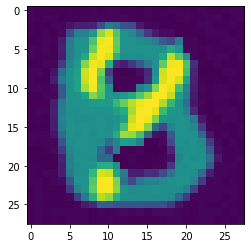

In [ ]:
plt.imshow(x_test[k])
plt.show()

In [28]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=-1)
df_sub = pd.read_csv('submission.csv',index_col=0)
df_sub['digit'] = y_pred
df_sub.to_csv('test_4.csv')
y_pred

array([6, 8, 8, ..., 6, 8, 0], dtype=int64)

array([6, 9, 8, ..., 6, 8, 0], dtype=int64)

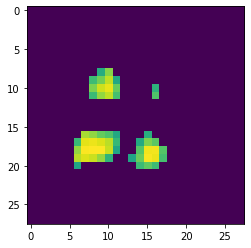

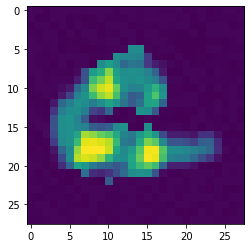

In [ ]:
k=5
df = pd.read_csv("preprocessing_150.csv",index_col=[0])
df2 = pd.read_csv("train.csv",index_col=[0])
plt.imshow(df.values[k,2:].reshape(28,28).astype('float32'))
plt.show()
df2 = pd.read_csv("train.csv",index_col=[0])
plt.imshow(df2.values[k,2:].reshape(28,28).astype('float32'))
plt.show()